<a href="https://colab.research.google.com/github/sasurasa/2025/blob/main/HP_project_300824SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

In [2]:
def non_null_values(row, columns):
    return [row[col] for col in columns if pd.notnull(row[col])]

In [3]:
hp_all = pd.read_csv('/content/hp_all_train.csv', header=None)
hp_all.head()

<ipython-input-3-aa7d69cc7630>:1: DtypeWarning: Columns (35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203) have mixed types. Specify dtype option on import or set low_memory=False.
  hp_all = pd.read_csv('/content/hp_all_train.csv', header=None)


0           1           2           3           4           5    \
0  HP:0000347  HP:0003020  HP:0009381  HP:0000204  HP:0000625         NaN   
1  HP:0000347  HP:0003021  HP:0009381  HP:0000204  HP:0000625         NaN   
2  HP:0000347  HP:0003022  HP:0009381  HP:0000204  HP:0000625         NaN   
3  HP:0000347  HP:0009381  HP:0000204  HP:0000625         NaN         NaN   
4  HP:0001903  HP:0000347  HP:0003022  HP:0009381  HP:0000204  HP:0000625   

   6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   96   97   98   99   100  101  102  103  104  105  106  107  108  109  110  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  Na

In [4]:
def non_null_values(row):
    return [value for value in row if pd.notnull(value)]

hp_list = hp_all.apply(non_null_values, axis=1)

In [5]:
from itertools import permutations
transactions = list(hp_list) #Convert dataframe to a list of list
flattened = [item for transaction in transactions for item in transaction] #Takeout individual items to a big list
items = list(set(flattened)) #Reduce to unique set

In [6]:
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot.head()

HP:0000002  HP:0000003  HP:0000006  HP:0000008  HP:0000009  HP:0000010  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000011  HP:0000012  HP:0000013  HP:0000014  HP:0000015  HP:0000016  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000017  HP:0000020  HP:0000021  HP:0000023  HP:0000024  HP:0000025  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000026  HP:0000027  HP:0000028  HP:0000029  HP:0000031  HP:0000032  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000033  HP:0000034  HP:0000035  HP:0000036  HP:0000037  HP:0000039  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000040  HP:0000041  HP:0000044  HP:0000045  HP:0000046  HP:0000047  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000048  HP:0000049  HP:0000050  HP:0000051  HP:0000053  HP:0000054  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000059  HP:0000060  HP:0000061  HP:0000062  HP:0000063  HP:0000064  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   HP:0000065  HP:0000066  HP:0000069  HP:0000070  HP:0000071  HP:0000072  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       

In [7]:
hp_onehot = onehot.astype(int)
hp_onehot.head()

HP:0000002  HP:0000003  HP:0000006  HP:0000008  HP:0000009  HP:0000010  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000011  HP:0000012  HP:0000013  HP:0000014  HP:0000015  HP:0000016  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000017  HP:0000020  HP:0000021  HP:0000023  HP:0000024  HP:0000025  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000026  HP:0000027  HP:0000028  HP:0000029  HP:0000031  HP:0000032  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000033  HP:0000034  HP:0000035  HP:0000036  HP:0000037  HP:0000039  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000040  HP:0000041  HP:0000044  HP:0000045  HP:0000046  HP:0000047  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000048  HP:0000049  HP:0000050  HP:0000051  HP:0000053  HP:0000054  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000059  HP:0000060  HP:0000061  HP:0000062  HP:0000063  HP:0000064  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   HP:0000065  HP:0000066  HP:0000069  HP:0000070  HP:0000071  HP:0000072  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0       

In [8]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [9]:
#Get a frequent basket list (lower threshold of min_support)
hp_fis_0005 = apriori(onehot, min_support=0.0005, max_len=10, use_colnames=True, low_memory= True)
len(hp_fis_0005)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


28379

In [10]:
#Get a frequent basket list (upper threshold of min_support)
hp_fis_001 = apriori(onehot, min_support=0.001, max_len=10, use_colnames=True, low_memory= True)
len(hp_fis_001)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2001

In [11]:
hp_fis_0005.to_csv('hp_fis_0005.csv', index=False)
hp_fis_001.to_csv('hp_fis_001.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
hp_fis_0005.tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support                                           itemsets
28369  0.000534  (HP:0001888, HP:0002904, HP:0001923, HP:000315...
28370  0.000534  (HP:0001888, HP:0002904, HP:0001923, HP:000315...
28371  0.000534  (HP:0001888, HP:0002904, HP:0001923, HP:000315...
28372  0.000534  (HP:0001888, HP:0002904, HP:0001923, HP:000315...
28373  0.000534  (HP:0001888, HP:0002904, HP:0001923, HP:001211...
28374  0.000534  (HP:0001888, HP:0001923, HP:0003155, HP:001211...
28375  0.000534  (HP:0001888, HP:0002904, HP:0001923, HP:000315...
28376  0.000534  (HP:0001888, HP:0002904, HP:0003155, HP:001211...
28377  0.000534  (HP:0002904, HP:0001923, HP:0003155, HP:001211...
28378  0.000534  (HP:0001888, HP:0002904, HP:0001923, HP:000315...

In [14]:
#Create ML models
model_1 = association_rules(hp_fis_0005, metric = 'support', min_threshold = 0.0005)
len(model_1)
model_1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents   consequents  antecedent support  consequent support  \
0  (HP:0002023)  (HP:0000003)            0.010020            0.003528   
1  (HP:0000003)  (HP:0002023)            0.003528            0.010020   
2  (HP:0000020)  (HP:0000967)            0.002342            0.002609   
3  (HP:0000967)  (HP:0000020)            0.002609            0.002342   
4  (HP:0000978)  (HP:0000020)            0.009219            0.002342   

    support  confidence       lift  leverage  conviction  zhangs_metric  
0  0.000771    0.076923  21.805430  0.000735    1.079512       0.963797  
1  0.000771    0.218487  21.805430  0.000735    1.266749       0.957518  
2  0.000563    0.240506  92.193182  0.000557    1.313232       0.991475  
3  0.000563    0.215909  92.193182  0.000557    1.272376       0.991740  
4  0.000563    0.061093  26.086817  0.000542    1.062574       0.970615

In [ ]:
model_1['antecedents'] = model_1['antecedents'].apply(lambda a: ','.join(list(a)))
model_1['consequents'] = model_1['consequents'].apply(lambda a: ','.join(list(a)))
model_1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


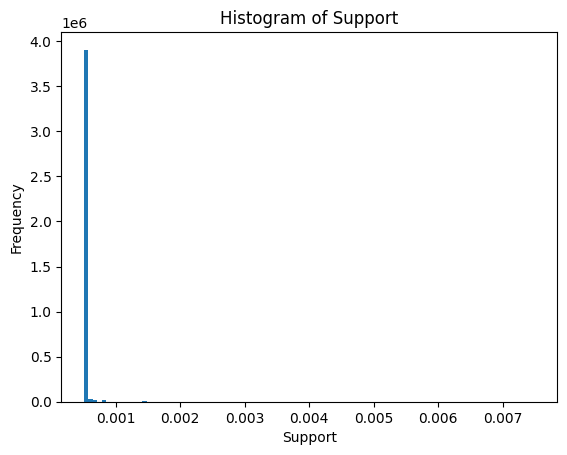

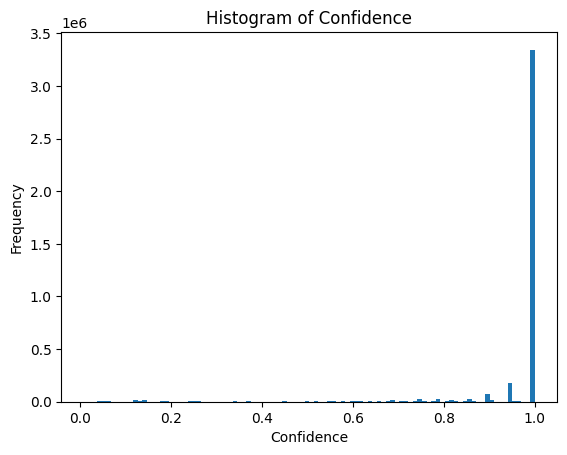

In [34]:
#Draw histogram of support
plt.hist(model_1['support'], bins=100)
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.title('Histogram of Support')
plt.show()
#Draw histogram of confidence
plt.hist(model_1['confidence'], bins=100)
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.title('Histogram of Confidence')
plt.show()

In [41]:
#Important! Select by support
print('before', len(model_1))
model_1_filter = model_1[(model_1['support'] >= 0.0008) & (model_1['confidence'] >= 0.8)]
print('after', len(model_1_filter))

before 3991782
after 24810


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
model_1_col = model_1_filter[['antecedents', 'consequents']].copy()
model_1_col.rename(columns={'antecedents': 'input', 'consequents': 'output'}, inplace=True)
def count_words_starting_with_HP(item):
  words = item.split(',')
  count = sum(1 for word in words if word.startswith('HP:'))
  return count
model_1_col['in_length'] = model_1_col['input'].apply(count_words_starting_with_HP)
model_1_col['out_length'] = model_1_col['output'].apply(count_words_starting_with_HP)
model_1_col.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


input  \
2821819  HP:0003418,HP:0008419   
2821820  HP:0003418,HP:0003307   
2821822  HP:0003307,HP:0008419   
2821823  HP:0008419,HP:0030833   
2821824  HP:0003307,HP:0030833   

                                                    output  in_length  \
2821819  HP:0001065,HP:0001058,HP:0000977,HP:0002808,HP...          2   
2821820  HP:0001065,HP:0001058,HP:0000977,HP:0002808,HP...          2   
2821822  HP:0001065,HP:0001058,HP:0000977,HP:0002808,HP...          2   
2821823  HP:0001065,HP:0001058,HP:0000977,HP:0002808,HP...          2   
2821824  HP:0001065,HP:0001058,HP:0000977,HP:0002808,HP...          2   

         out_length  
2821819           7  
2821820           7  
2821822           7  
2821823           7  
2821824           7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


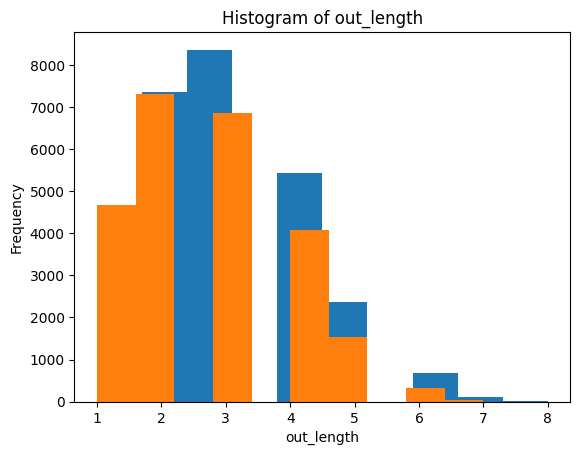

In [44]:
plt.hist(model_1_col['in_length'], bins=10)
plt.xlabel('in_length')
plt.ylabel('Frequency')
plt.title('Histogram of in_length')

plt.hist(model_1_col['out_length'], bins=10)
plt.xlabel('out_length')
plt.ylabel('Frequency')
plt.title('Histogram of out_length')
plt.show()

Placeholder here.

In [27]:
B = [HP:0001888,HP:0002904,HP:0001923,HP:0003155]
len(B)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-27-1121d132990e>, line 1)

In [26]:
model_1_col.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


input                                             output  \
3991777  [HP:0100702]  [HP:0001888,HP:0002904,HP:0001923,HP:0003155,H...   
3991778  [HP:0009830]  [HP:0001888,HP:0002904,HP:0001923,HP:0003155,H...   
3991779  [HP:0031438]  [HP:0001888,HP:0002904,HP:0001923,HP:0003155,H...   
3991780  [HP:0003198]  [HP:0001888,HP:0002904,HP:0001923,HP:0003155,H...   
3991781  [HP:0002027]  [HP:0001888,HP:0002904,HP:0001923,HP:0003155,H...   

         out_length  
3991777           1  
3991778           1  
3991779           1  
3991780           1  
3991781           1

In [ ]:
def count_words_starting_with_HP(item):
    words = item.split(',')
    count = sum(1 for word in words if word.startswith('HP:'))
    return count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules_1['con_length'] = rules_1['consequents'].apply(count_words_starting_with_HP)
rules_1.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                                        consequents  \
3991777  HP:0009830  HP:0003155,HP:0001923,HP:0002027,HP:0003198,HP...   
3991778  HP:0002904  HP:0003155,HP:0001923,HP:0002027,HP:0003198,HP...   
3991779  HP:0100702  HP:0003155,HP:0001923,HP:0002027,HP:0003198,HP...   
3991780  HP:0012117  HP:0003155,HP:0001923,HP:0002027,HP:0003198,HP...   
3991781  HP:0001888  HP:0003155,HP:0001923,HP:0002027,HP:0003198,HP...   

         antecedent support  consequent support   support  confidence  \
3991777            0.003765            0.000534  0.000534    0.141732   
3991778            0.002846            0.000534  0.000534    0.187500   
3991779            0.002253            0.000534  0.000534    0.236842   
3991780            0.000711            0.000534  0.000534    0.750000   
3991781            0.001571            0.000534  0.000534    0.339623   

                lift  leverage  conviction  zhangs_metric  con_length  
3991777   265.614173  0.000532    1.164516            1.0           9  
3991778   351.385417  0.000532    1.230112            1.0           9  
3991779   443.855263  0.000532    1.309646            1.0           9  
3991780  1405.541667  0.000533    3.997866            1.0           9  
3991781   636.471698  0.000533    1.513478            1.0           9

In [ ]:
df_sorted = rules_1.sort_values(['antecedents', 'con_length', 'consequent support', 'confidence'], ascending=[True, False, False, False])
len(df_sorted)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3991782

deduplicated path

In [ ]:
df_deduplicated = df_sorted.drop_duplicates(subset='antecedents', keep='first')
len(df_deduplicated)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


27614

In [ ]:
df_deduplicated['antecount'] = df_deduplicated['antecedents'].apply(count_words_starting_with_HP)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-0ba0ccdd8f27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deduplicated['antecount'] = df_deduplicated['antecedents'].apply(count_words_starting_with_HP)


In [ ]:
df_deduplicated_sorted = df_deduplicated.sort_values('antecount', ascending=False)
df_deduplicated_sorted.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents            consequents  antecedent support  \
3928   HP:0001762             HP:0004322            0.007737   
11603  HP:0001763  HP:0002020,HP:0000978            0.006818   
661    HP:0001770             HP:0000252            0.002846   
7941   HP:0001776  HP:0000347,HP:0000768            0.002876   
3945   HP:0001798             HP:0006118            0.001067   

       consequent support   support  confidence        lift  leverage  \
3928             0.058459  0.000504    0.065134    1.114183  0.000052   
11603            0.000563  0.000504    0.073913  131.226773  0.000500   
661              0.043844  0.000652    0.229167    5.226828  0.000527   
7941             0.000830  0.000504    0.175258  211.141753  0.000502   
3945             0.000889  0.000830    0.777778  874.559259  0.000829   

       conviction  zhangs_metric  con_length  antecount  
3928     1.007140       0.103280           1          1  
11603    1.079204       0.999192           2          1  
661      1.240418       0.810987           1          1  
7941     1.211494       0.998134           2          1  
3945     4.495998       0.999924           1          1

In [ ]:
rules_dedup_filtered = df_deduplicated_sorted[['antecedents', 'consequents']].copy()
for col in rules_dedup_filtered.columns:
  rules_dedup_filtered[col] = rules_dedup_filtered[col].apply(lambda x: [x])
rules_dedup_filtered.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents              consequents
3928   [HP:0001762]             [HP:0004322]
11603  [HP:0001763]  [HP:0002020,HP:0000978]
661    [HP:0001770]             [HP:0000252]
7941   [HP:0001776]  [HP:0000347,HP:0000768]
3945   [HP:0001798]             [HP:0006118]

In [ ]:
#Filter for single antecedents
filtered_hp_rules = df_deduplicated_sorted[df_deduplicated_sorted['antecount'] == 1]
len(filtered_hp_rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


574

non-deduplicated path: branched from df_sorted

In [ ]:
df_sorted['antecount'] = df_sorted['antecedents'].apply(count_words_starting_with_HP)
df_sorted.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


antecedents consequents  antecedent support  \
58639  HP:0200085,HP:0100785,HP:0030834  HP:0003418            0.000563   
22211  HP:0200085,HP:0100785,HP:0030834  HP:0000020            0.000563   
3018                         HP:0200134  HP:0001250            0.003261   
5166                         HP:0200134  HP:0012469            0.003261   
369                          HP:0410030  HP:0000175            0.003913   

       consequent support   support  confidence        lift  leverage  \
58639            0.002876  0.000563    1.000000  347.762887  0.000562   
22211            0.002342  0.000563    1.000000  427.000000  0.000562   
3018             0.037085  0.000978    0.300000    8.089448  0.000857   
5166             0.001660  0.000534    0.163636   98.570455  0.000528   
369              0.024457  0.001423    0.363636   14.868540  0.001327   

       conviction  zhangs_metric  con_length  antecount  
58639         inf       0.997686           1          3  
22211         inf       0.998220           1          3  
3018     1.375592       0.879249           1          1  
5166     1.193667       0.993093           1          1  
369      1.532997       0.936408           1          1

In [ ]:
df_sorted_singleante = df_sorted[df_sorted['antecount'] == 1]
len(df_sorted_singleante)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


156380

In [ ]:
df_sorted_singleante.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents consequents  antecedent support  consequent support  \
4614  HP:0200085  HP:0002317            0.000978            0.001067   
5202  HP:0200085  HP:0030834            0.000978            0.000978   
3018  HP:0200134  HP:0001250            0.003261            0.037085   
5166  HP:0200134  HP:0012469            0.003261            0.001660   
369   HP:0410030  HP:0000175            0.003913            0.024457   

       support  confidence        lift  leverage  conviction  zhangs_metric  \
4614  0.000504    0.515152  482.711279  0.000503    2.060299       0.998906   
5202  0.000563    0.575758  588.546373  0.000562    2.354837       0.999278   
3018  0.000978    0.300000    8.089448  0.000857    1.375592       0.879249   
5166  0.000534    0.163636   98.570455  0.000528    1.193667       0.993093   
369   0.001423    0.363636   14.868540  0.001327    1.532997       0.936408   

      con_length  antecount  
4614           1          1  
5202           1          1  
3018           1          1  
5166           1          1  
369            1          1

In [ ]:
def get_con_value(input_value):

    matching_rows = df_sorted_singleante.loc[df_sorted_singleante['antecedents'] == input_value, 'consequents']
    if not matching_rows.empty:
        return matching_rows.tolist()  # Convert Series to list
    else:
        return None

# Get user input
input_value = input("Enter a value from antecedent: ")

# Retrieve and print the corresponding col2 value(s)
output_values = get_con_value(input_value)
if output_values:
    print(f"For input '{input_value}', the corresponding values in consequents are:")
    for value in output_values:
        print(f"  - {value}")
else:
    print(f"Input value '{input_value}' not found in antecedents.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter a value from antecedent: HP:0410030
For input 'HP:0410030', the corresponding values in consequents are:
  - HP:0000175


In [ ]:
unique_values_list = df_sorted_singleante['antecedents'].unique().tolist()
len(unique_values_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


574

In [ ]:
hp_rule = {
  'input': unique_values_list,
}
hp_rule = pd.DataFrame(hp_rule)
hp_rule['output'] = hp_rule['input'].apply(get_con_value)
hp_rule.tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


input                                             output
564  HP:0100704  [HP:0001263,HP:0001344, HP:0001263, HP:0000252...
565  HP:0100738                           [HP:0002376, HP:0000735]
566  HP:0100749  [HP:0002094,HP:0002027, HP:0002092,HP:0002617,...
567  HP:0100785  [HP:0003418,HP:0030834,HP:0000020,HP:0030833,H...
568  HP:0100807                                       [HP:0000316]
569  HP:0100825  [HP:0001945,HP:0000969,HP:0000206,HP:0000509,H...
570  HP:0100830               [HP:0000365, HP:0000252, HP:0000276]
571  HP:0200085  [HP:0003418,HP:0030834,HP:0000020,HP:0030833,H...
572  HP:0200134                           [HP:0001250, HP:0012469]
573  HP:0410030                                       [HP:0000175]

In [ ]:
#Get_in validation set
hp_val = pd.read_csv('/content/hp_val_dedup.csv', header=None)
hp_val.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-42-614f98d433a3>:2: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188) have mixed types. Specify dtype option on

0           1           2           3    4    5    6    7    8    \
0  HP:0001258  HP:0002313  HP:0007020         NaN  NaN  NaN  NaN  NaN  NaN   
1  HP:0004322  HP:0000365  HP:0002013  HP:0001250  NaN  NaN  NaN  NaN  NaN   
2  HP:0001894  HP:0001332  HP:0012452         NaN  NaN  NaN  NaN  NaN  NaN   
3  HP:0001894  HP:0012452         NaN         NaN  NaN  NaN  NaN  NaN  NaN   
4  HP:0012452  HP:0011873         NaN         NaN  NaN  NaN  NaN  NaN  NaN   

   9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   54   55   56   57   58   59   60   61   62   63   64   65   66   67   68   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   69   70   71   72   73   74   75   76   77   78   79   80   81   82   83   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   84   85   86   87   88   89   90   91   92   93   94   95   96   97   98   \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   99   100  101  102  103  104  105  106  107  108  109  110  111  112  113  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  N

In [ ]:
#Transform the table
hp_val_1 = pd.DataFrame({
    'input': hp_val.iloc[:, 0],  # First column of hp_val
    'output': hp_val.iloc[:, 1:].apply(lambda row: [x for x in row.tolist() if pd.notnull(x)], axis=1)
})
hp_val_1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


input                                output
0  HP:0001258              [HP:0002313, HP:0007020]
1  HP:0004322  [HP:0000365, HP:0002013, HP:0001250]
2  HP:0001894              [HP:0001332, HP:0012452]
3  HP:0001894                          [HP:0012452]
4  HP:0012452                          [HP:0011873]

In [ ]:
df1 = hp_rule
df2 = hp_val_1

def calculate_points(row, df1):
      if row['input'] in df1['input'].values:
        df1_row = df1[df1['input'] == row['input']].iloc[0]
        if set(row['output']) == set(df1_row['output']):
            return 2  # Exact match
        # Check for partial match in col2
        elif any(item in df1_row['output'] for item in row['output']):
            return 1  # Partial match
      return 0  # No match or no exact/partial match in col2


df2['point'] = df2.apply(lambda row: calculate_points(row, df1), axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


input                                output  point  point_2
0  HP:0001258              [HP:0002313, HP:0007020]      0        0
1  HP:0004322  [HP:0000365, HP:0002013, HP:0001250]      1        0
2  HP:0001894              [HP:0001332, HP:0012452]      0        0
3  HP:0001894                          [HP:0012452]      0        0
4  HP:0012452                          [HP:0011873]      0        0

In [ ]:
value_counts = df2['point'].value_counts()
total_count = len(df2)
percentages = (value_counts / total_count) * 100
result_df = pd.DataFrame({
    'Value': value_counts.index,
    'Count': value_counts.values,
    'Percentage': percentages.values
})

print(result_df)

   Value  Count  Percentage
0      0   6549   73.115999
1      1   2322   25.923858
2      2     86    0.960143


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df3 = rules_dedup_filtered
df3.rename(columns={'antecedents': 'input', 'consequents': 'output'}, inplace=True)
df3['input'] = df3['input'].apply(lambda x: x[0])
df3.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


input                   output
3928   HP:0001762             [HP:0004322]
11603  HP:0001763  [HP:0002020,HP:0000978]
661    HP:0001770             [HP:0000252]
7941   HP:0001776  [HP:0000347,HP:0000768]
3945   HP:0001798             [HP:0006118]

In [ ]:
def calculate_points_2(row, df3):
      if row['input'] in df3['input'].values:
        df3_row = df3[df3['input'] == row['input']].iloc[0]
        if set(row['output']) == set(df3_row['output']):
            return 2  # Exact match
        # Check for partial match in col2
        elif any(item in df3_row['output'] for item in row['output']):
            return 1  # Partial match
      return 0  # No match or no exact/partial match in col2
df2['point_2'] = df2.apply(lambda row: calculate_points_2(row, df3), axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
value_counts = df2['point_2'].value_counts()
total_count = len(df2)
percentages = (value_counts / total_count) * 100
result_df = pd.DataFrame({
    'Value': value_counts.index,
    'Count': value_counts.values,
    'Percentage': percentages.values
})

print(result_df)

   Value  Count  Percentage
0      0   8957       100.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
